In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np

(np.float64(-0.5), np.float64(1499.5), np.float64(1999.5), np.float64(-0.5))

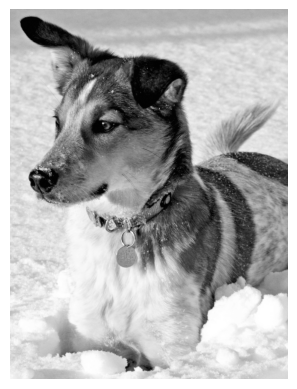

In [39]:
dog = plt.imread(os.path.join("..","DATA", "dog.jpg"))
X = np.mean(dog, -1)
plt.imshow(X, cmap='gray')
plt.axis('off')

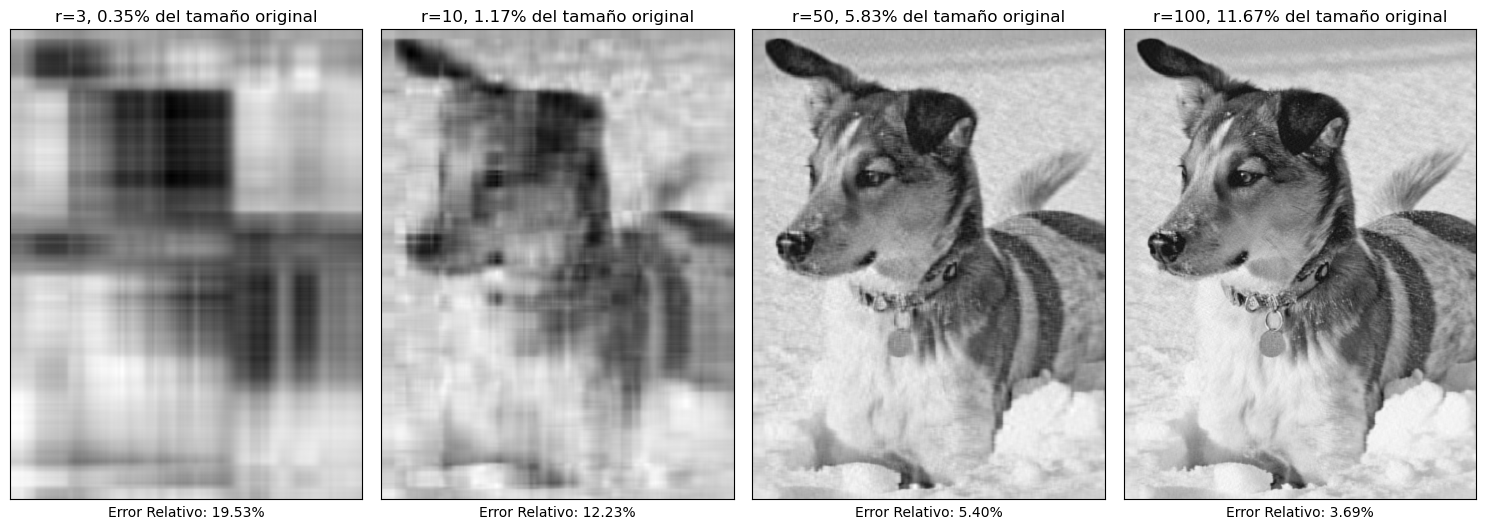

In [ ]:
U, S, Vt = np.linalg.svd(X, full_matrices=False)
ranks = [3, 10, 50, 100]
fig, axes = plt.subplots(1, len(ranks), figsize=(15, 5))
m,n = X.shape
original = m*n

for ax, r in zip(axes, ranks):
    Xapprox = U[:, :r] @ np.diag(S[:r]) @ Vt[:r, :]
    comprimido = m*r + r + r*n
    porcentaje = 100 * comprimido / original
    errorRel = np.linalg.norm(X - Xapprox, 'fro')/np.linalg.norm(X,'fro')*100
    ax.imshow(Xapprox, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"r={r}, {porcentaje:.2f}% del tamaño original")
    ax.set_xlabel(f"Error Relativo: {errorRel:.2f}%")

plt.tight_layout()
plt.show()


> Nota: quizas sea mas correcto usar el PSNR (Peak Signal to Noise Ratio) en lugar del error relativo para evaluar la calidad de la compresion de imagenes, pero como aun no aprendi exactamente que es voy a obviarlo por ahora.